<a href="https://www.kaggle.com/code/iitm21f3001282/21f3001282-notebook?scriptVersionId=128570425" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import warnings
warnings.simplefilter(action='ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
raw = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv')
test = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv')
sample = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv')
ok = list(raw.columns.values)[0:10]
pre = list(raw.columns.values)[10:-1]
dummtest = []
for i in range(6599):
    dummtest.append(True)
frames = pd.DataFrame(dummtest, columns=['Made_Purchase'])
test = pd.concat((test,frames),1)
combined = pd.concat((raw,test))
combined['Made_Purchase'] = combined['Made_Purchase'].map({False:0, True:1})
combined_cont = combined[ok]
combined_disc = combined[pre]
contimp = KNNImputer()
discimp = SimpleImputer(strategy="most_frequent")
combined_cont = pd.DataFrame(StandardScaler().fit_transform(combined_cont),columns=ok)
contimp.fit(combined_cont)
discimp.fit(combined_disc)
combined_cont = pd.DataFrame(contimp.transform(combined_cont),columns=ok)
combined_disc = pd.DataFrame(discimp.transform(combined_disc),columns=pre)
reindexed = combined[['Made_Purchase']]
reindexed = reindexed.reset_index(drop=True)
for i in pre:
    combined_disc[i] = pd.factorize(combined_disc[i])[0]
combined = pd.concat((pd.concat((combined_cont,combined_disc),1),reindexed),1)
for i in pre:
    combined[i] = combined[i].astype('category')
test = combined.iloc[-6599:,:]
raw = combined.iloc[:-6599,:]
test = test.iloc[:,:-1]
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv


In [2]:
for_embedding = raw.iloc[:,:10]
for_test_embedding = test.iloc[:,:10]
y = raw.iloc[:,-1]
from sklearn.manifold import TSNE
temp_embedding = pd.concat((for_embedding,for_test_embedding))
temp_emb = TSNE(learning_rate='auto',init='pca',perplexity=25,n_components=1).fit_transform(temp_embedding)
from sklearn.manifold import trustworthiness
print(trustworthiness(temp_embedding,temp_emb))
emb = temp_emb[:-6599]
emb2 = temp_emb[-6599:]

0.9835183964863894


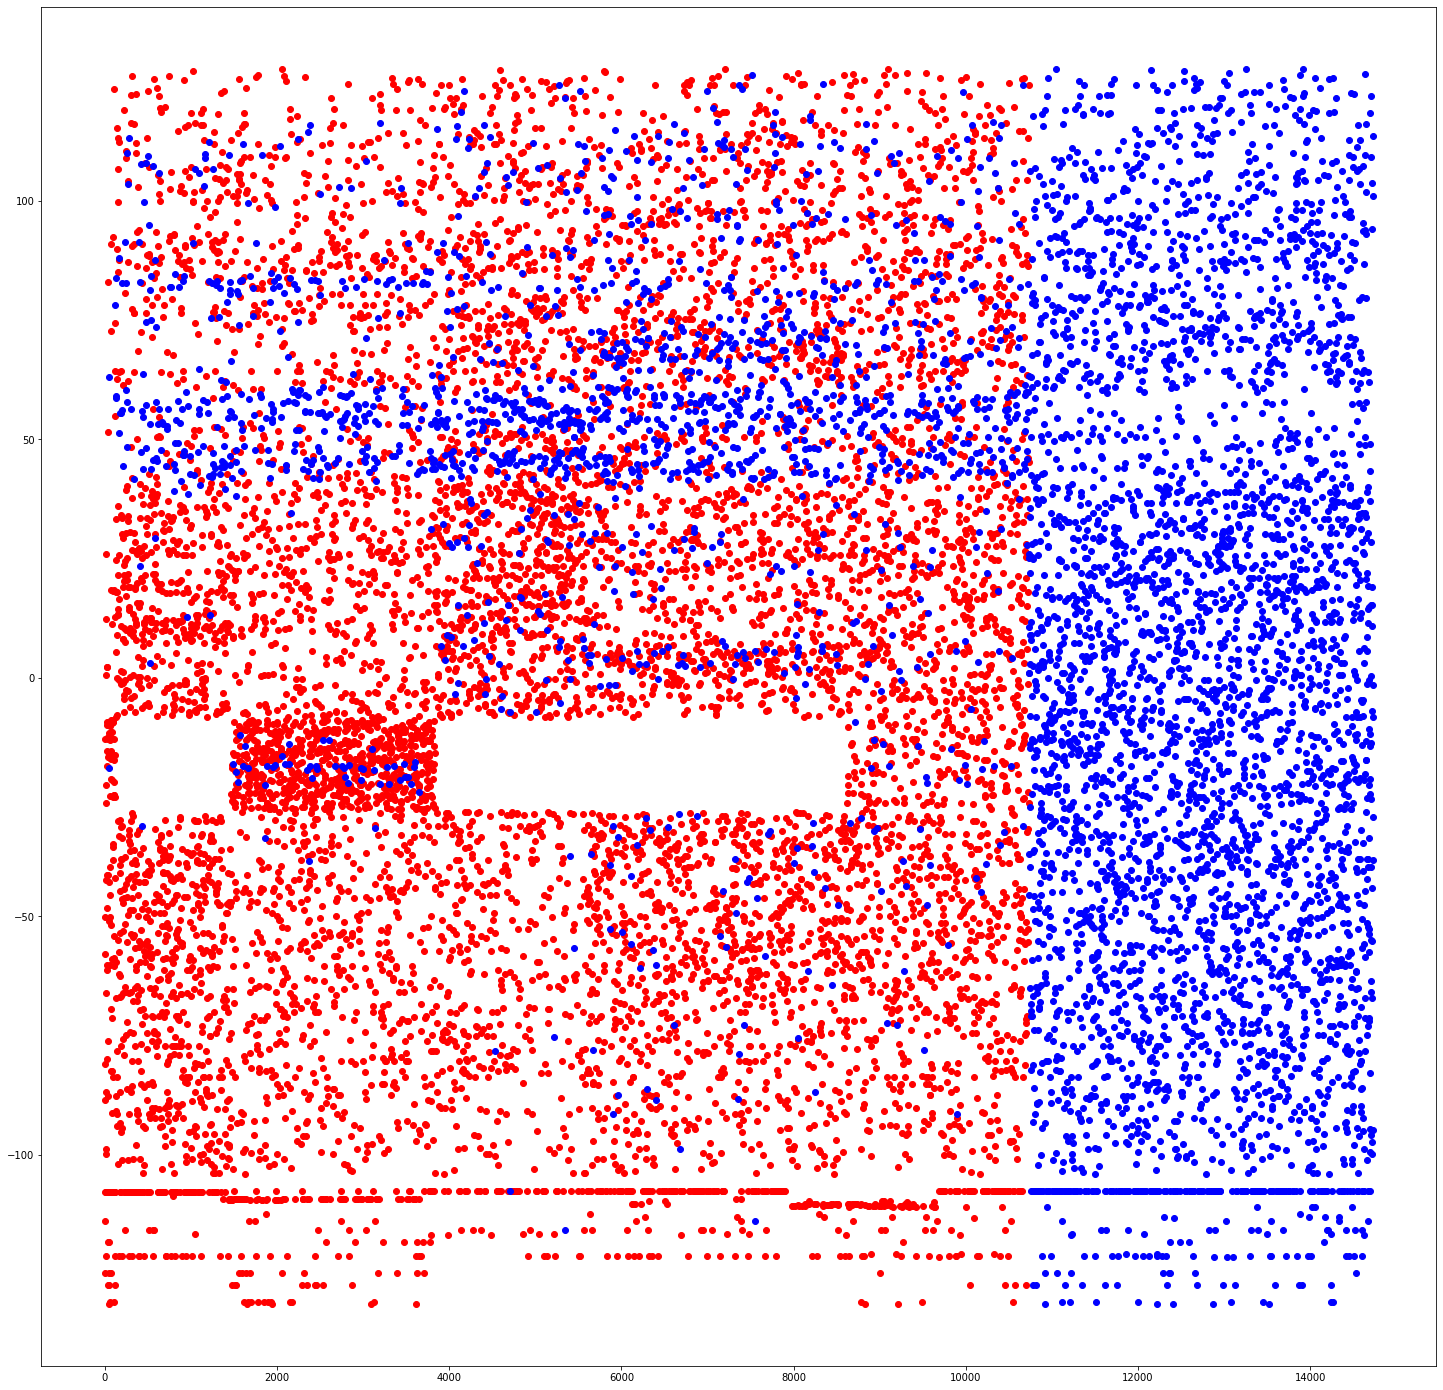

In [3]:
import seaborn as sb
import matplotlib.pyplot as plt
emb_x_1 = []
emb_x_2 = []
emb_1 = []
emb_2 = []
for i in range(len(emb)):
    if y.iloc[i]==0:
        emb_1.append(emb[i])
        emb_x_1.append(i)
    else:
        emb_2.append(emb[i])
        emb_x_2.append(i)
plt.figure(figsize=(25,25))
plt.scatter(emb_x_1, emb_1, color='red')
plt.scatter(emb_x_2, emb_2, color='blue')

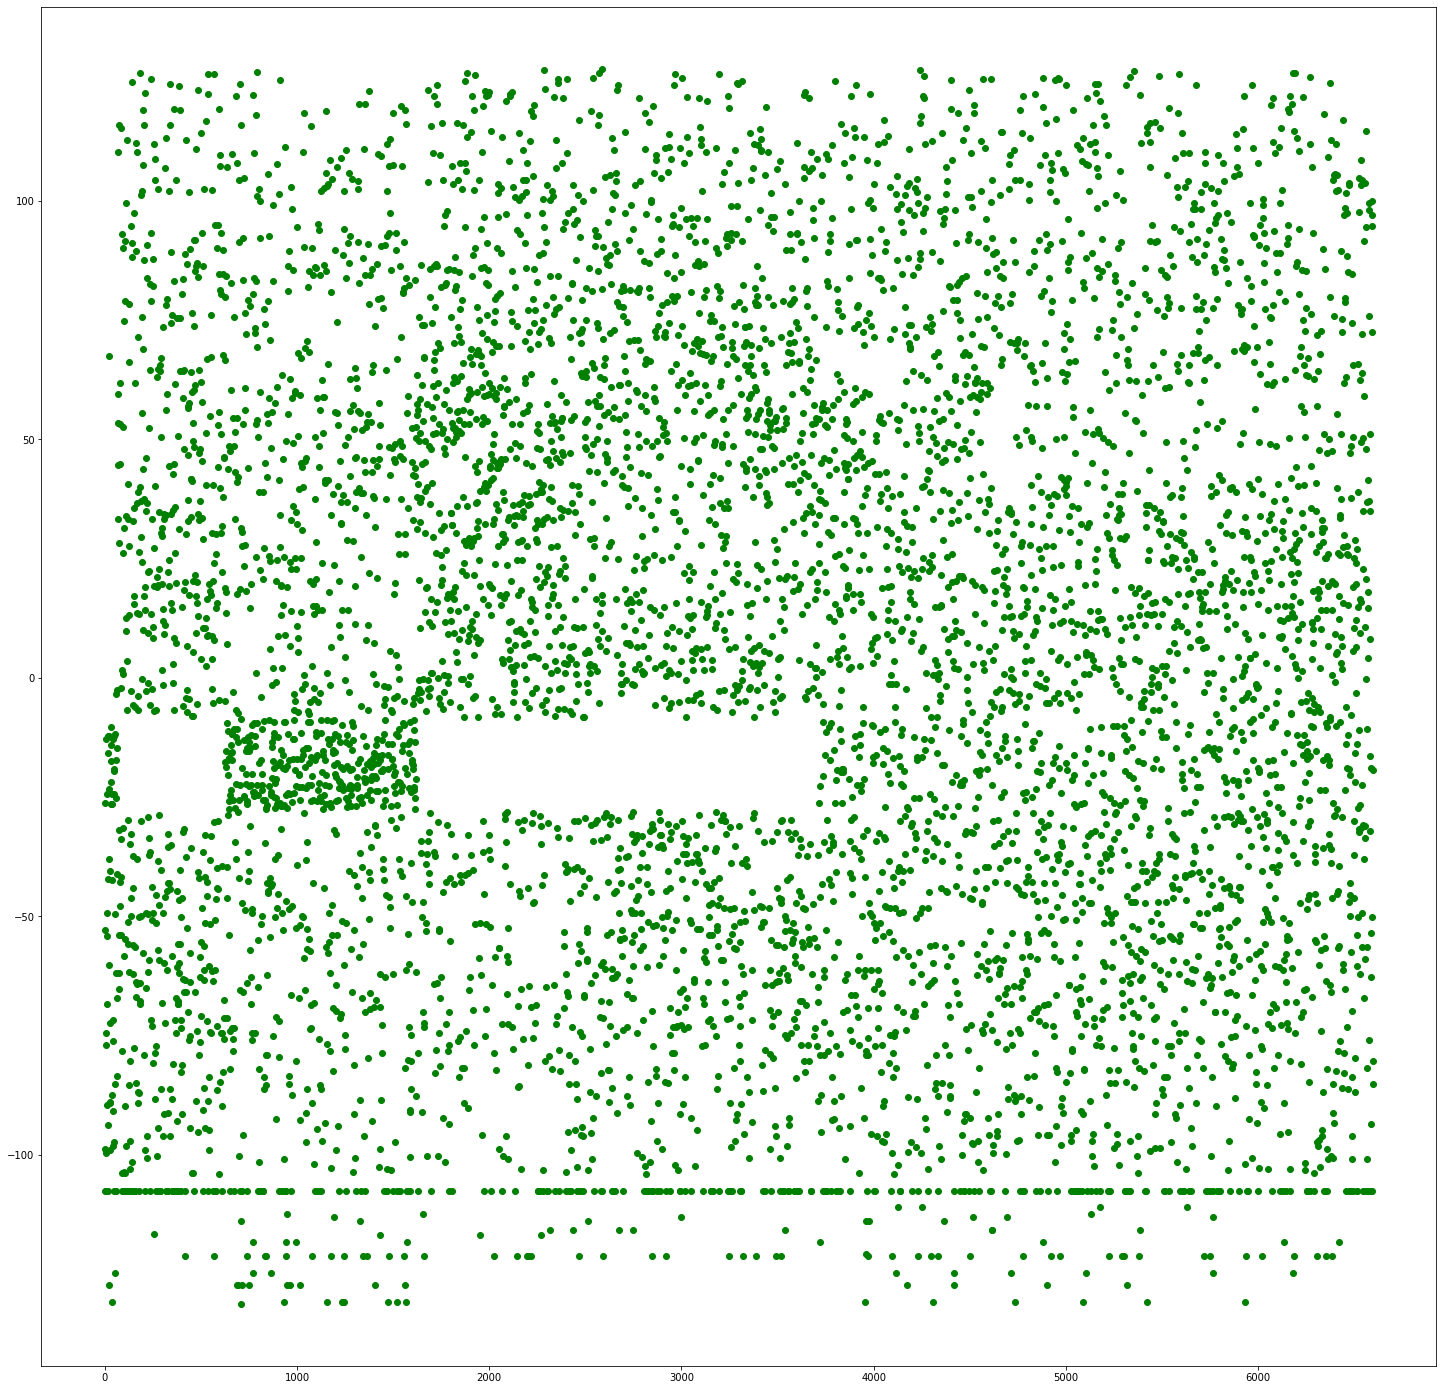

In [4]:
emb2_x = []
for i in range(len(emb2)):
    emb2_x.append(i)
plt.figure(figsize=(25,25))
plt.scatter(emb2_x, emb2, color='green')

<AxesSubplot:>

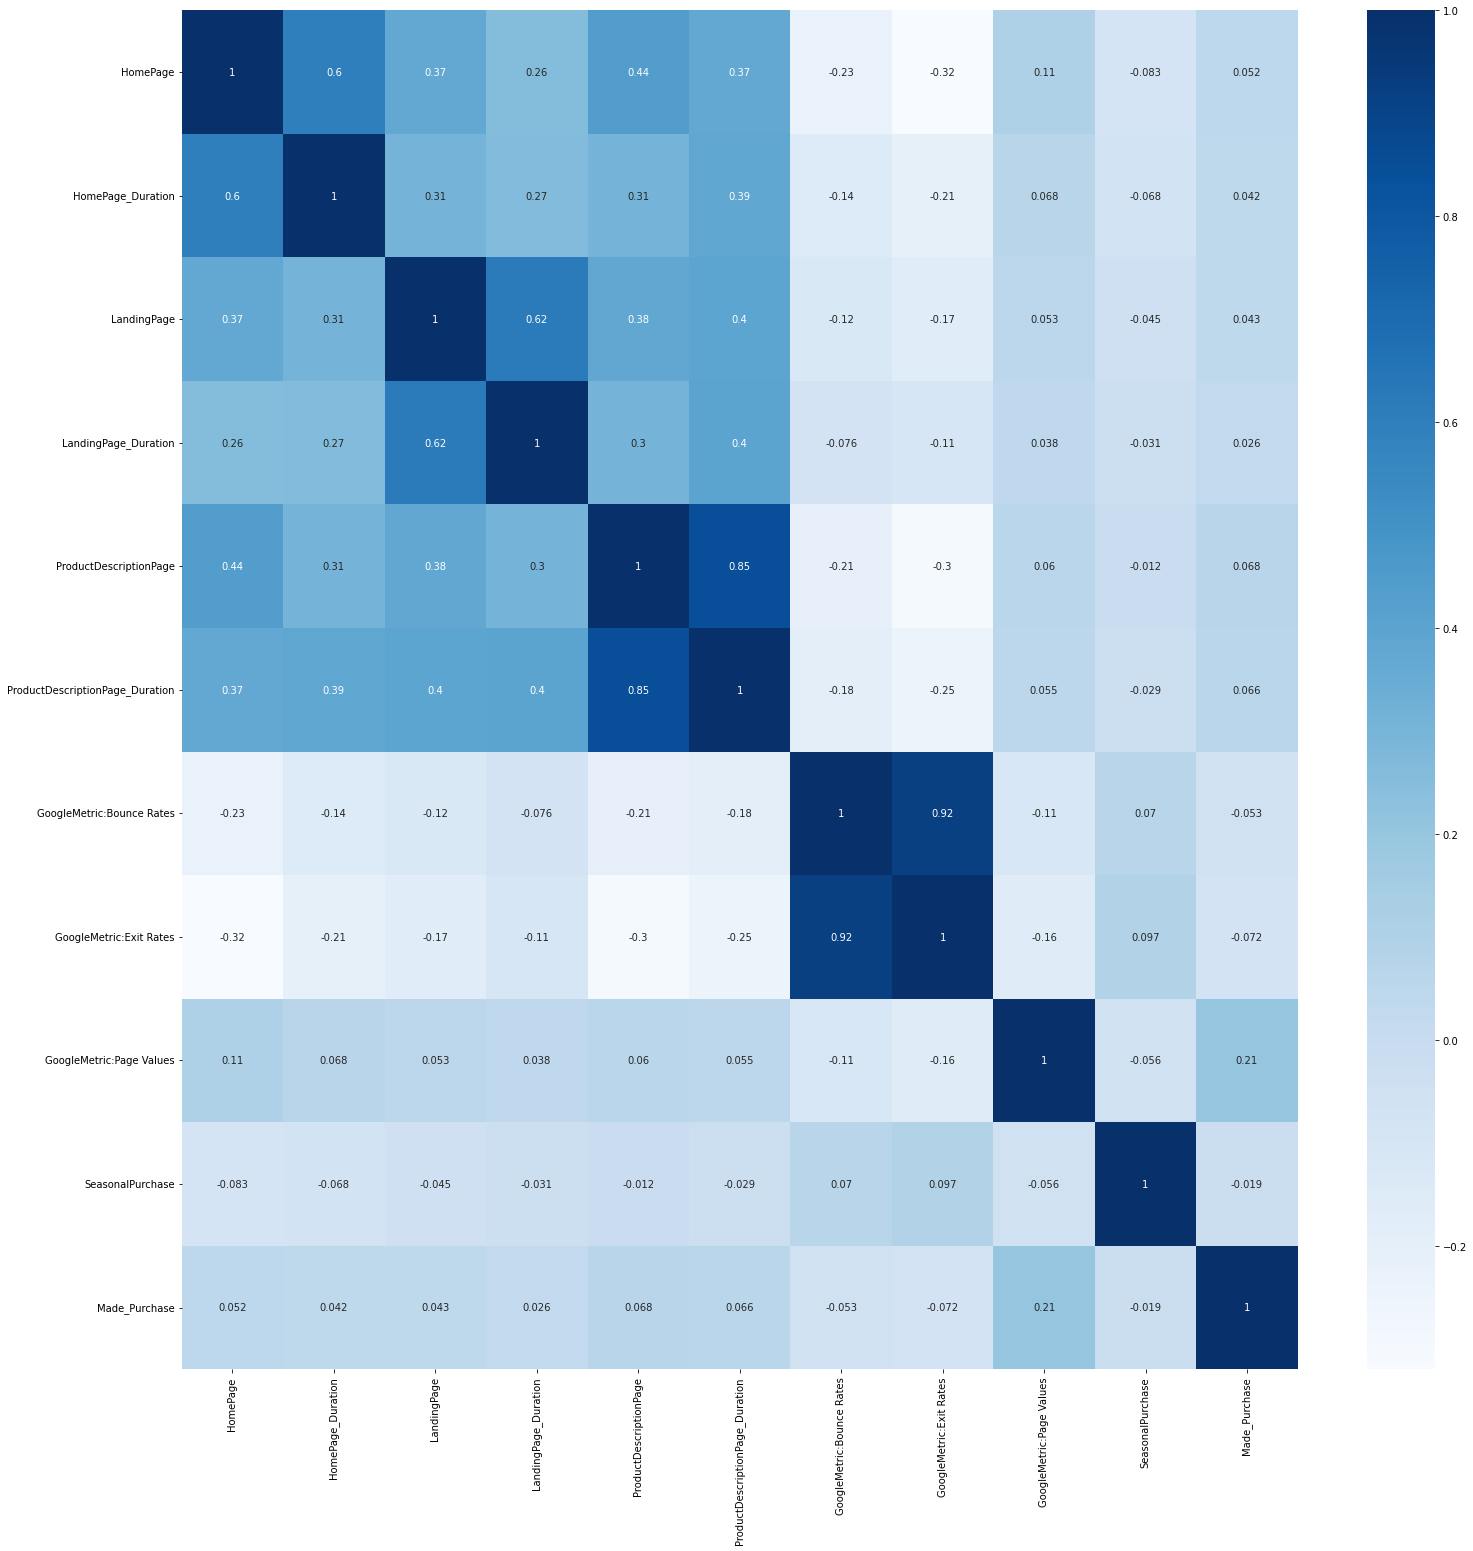

In [5]:
#serially speaking, after a certain point both train data
#and test data change behaviour while also having similar structure
#additionally after that very point
#every entry in train data is labelled True
#we hypothesize, comparing the embedded plots, that both train and test
#have an equal ratio of True labels at the end strip of the data
#the ratio will be taken from train data
#the remaining data will be trained normally
cor = raw.corr()
plt.figure(figsize=(25,25))
sb.heatmap(cor,annot=True,cmap='Blues')

<AxesSubplot:>

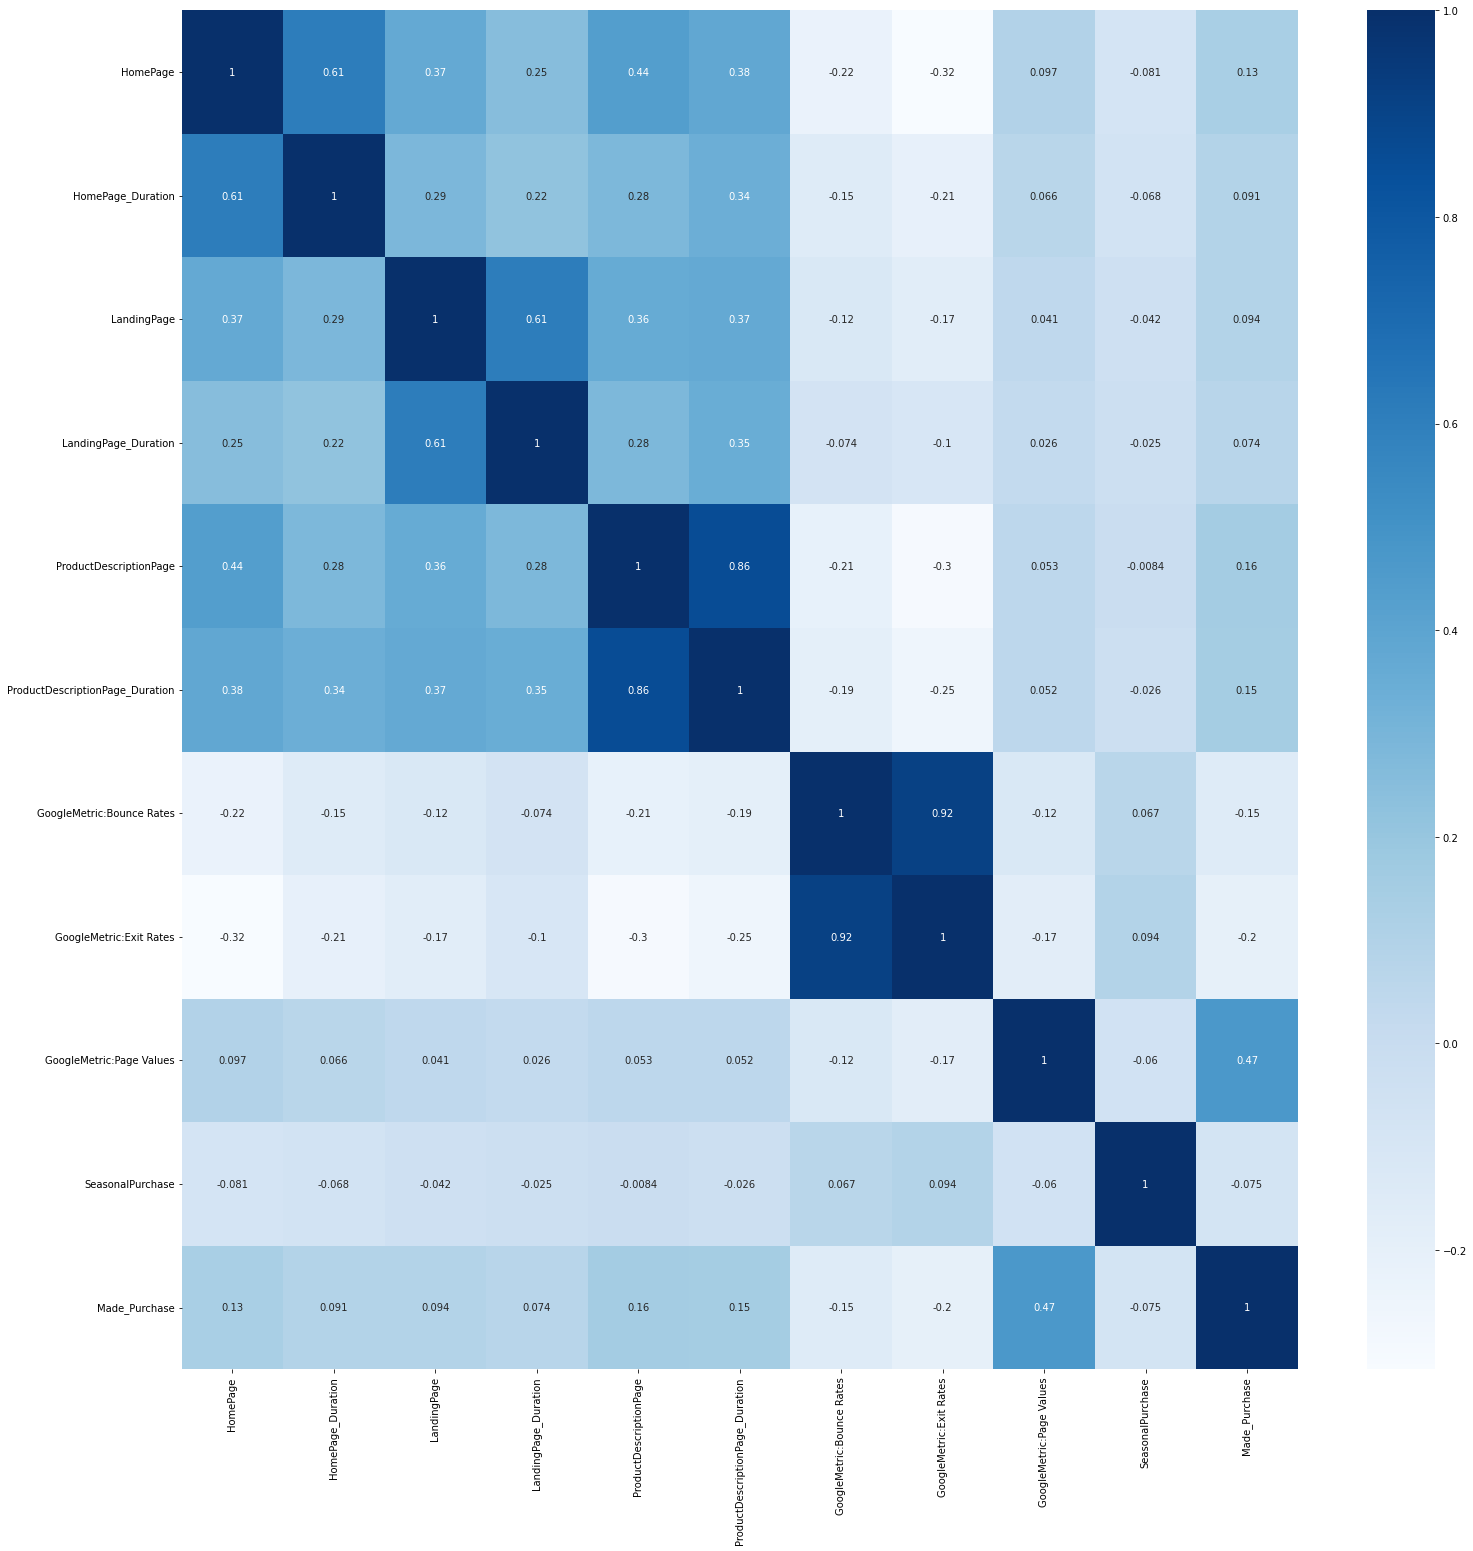

In [6]:
#after a certain point all the labels are true, removing them and 
#comparing correlations
cor2 = raw.iloc[:10732,:].corr()
plt.figure(figsize=(25,25))
sb.heatmap(cor2,annot=True,cmap='Blues')

In [7]:
#below was the initial idea, now trying new approach
#attempting a new method based on
#dummy model (False majority) accuracy about the test data
#this is more so about targetting the test data and information
#from leaderboard itself, and ideally works only 
#when the entire data is public



#ratio = 10732/raw.shape[0]
#test_split_val = int(ratio*test.shape[0])
#print(ratio)
#print(test_split_val)

In [8]:
raw = raw.iloc[:10732,:]
raw = raw.sample(frac=1,random_state=0)
raw.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,Made_Purchase
count,10732.000000,10732.000000,10732.000000,10732.000000,10732.000000,10732.000000,10732.000000,10732.000000,10732.000000,10732.000000,10732.000000
mean,0.012619,0.008858,0.005340,0.012581,0.018145,0.016364,-0.012930,-0.023073,0.055184,-0.016636,0.155330
std,0.998757,0.985749,0.989132,1.032065,1.003925,0.972252,0.987517,0.989382,1.089837,0.970140,0.362236
min,-0.683794,-0.446194,-0.390892,-0.240379,-0.703819,-0.592570,-0.465862,-0.898912,-0.284143,-0.316627,0.000000
25%,-0.683794,-0.446194,-0.390892,-0.240379,-0.546449,-0.498199,-0.465862,-0.609815,-0.284143,-0.316627,0.000000
50%,-0.381295,-0.400772,-0.390892,-0.240379,-0.299153,-0.283690,-0.397779,-0.388548,-0.284143,-0.316627,0.000000
75%,0.526201,0.079566,-0.390892,-0.240379,0.150475,0.156152,-0.129227,0.112929,-0.284143,-0.316627,0.000000
max,7.483670,14.641388,12.321709,18.169914,14.718435,31.695308,3.573764,3.148451,20.844289,4.619142,1.000000


In [9]:
#approx 58.8% test data has False label
#from previous attempts it was verified that there is a secondary
#'distribution' appended at the end of test data, and is in line
#with the train data distribution. however whether the ratio of
#distributions is actually equal in both train and test is unknown
#we can try to assume that the first distribution has equal class
#ratio for both train and test, which is approx 15.5% for True
#since 58.8% is False for test, rest is true, and some of it comes
#from first distribution, and rest from second distribution
#then let x% of total labels in test be first distribution True
#then (100-58.8)-x would be the true labels from second distribution
#we assume first distribution class ratio is same
#so x/(58.8+x)=0.155, x = 0.155*58.8 + 0.155*x
#so x = (0.155*58.8)/(1-0.115)
#so y = (100-58.8)-((0.155*58.8)/(1-0.115))
#so %age of first distribution would be
# 100-((100-58.8)-((0.155*58.8)/(1-0.115)))
# 58.8 + ((0.155*58.8)/(1-0.115))
ratio = (58.85 + ((0.1553*58.85)/(1-0.1153)))/100
test_split_val = int(ratio*test.shape[0])
test_decided, test = test.iloc[test_split_val:,:], test.iloc[:test_split_val,:]

In [10]:
from functools import partial
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

traindata = raw.iloc[:7000,:]
crossdata = raw.iloc[7000:,:]

feat_info = []
for i in traindata.columns.values:
    if i in pre:
        feat_info.append(True)
    else:
        feat_info.append(False)
feat_info = feat_info[:-1]
numfeat = 8
select = SelectKBest(score_func=partial(mutual_info_classif,discrete_features=feat_info),k=numfeat)
select.fit(traindata.iloc[:,:-1], traindata.iloc[:,-1])
traindata = pd.concat((pd.DataFrame(select.transform(traindata.iloc[:,:-1]),columns=select.get_feature_names_out()),traindata.iloc[:,-1].reset_index(drop=True)),1)
crossdata = pd.concat((pd.DataFrame(select.transform(crossdata.iloc[:,:-1]),columns=select.get_feature_names_out()),crossdata.iloc[:,-1].reset_index(drop=True)),1)
test = pd.DataFrame(select.transform(test),columns=select.get_feature_names_out())
print(select.get_feature_names_out())

['HomePage' 'HomePage_Duration' 'ProductDescriptionPage'
 'ProductDescriptionPage_Duration' 'GoogleMetric:Bounce Rates'
 'GoogleMetric:Exit Rates' 'GoogleMetric:Page Values' 'Type of Traffic']


In [11]:
#perform oversampling (or not) and one hot encoding
over_disc = []
for i in select.get_feature_names_out():
    if i in pre:
        over_disc.append(i)
over_bool = []
for i in traindata.columns.values:
    if i in over_disc:
        over_bool.append(True)
    else:
        over_bool.append(False)
over_bool = over_bool[:-1]
#from imblearn.over_sampling import SMOTENC
#oversamp = SMOTENC(categorical_features=over_bool)
#X_res, y_res = oversamp.fit_resample(traindata.iloc[:,:-1],traindata.iloc[:,-1])

X_res, y_res = traindata.iloc[:,:-1], traindata.iloc[:,-1]
cross_temp = crossdata.iloc[:,:-1]
comb_temp = pd.concat((X_res,cross_temp))
comb_temp.reset_index(drop=True,inplace=True)
comb_temp = pd.concat((comb_temp,test))
comb_temp.reset_index(drop=True,inplace=True)
comb_temp_disc = comb_temp[over_disc]
for i in over_disc:
    comb_temp.drop(i,axis=1,inplace=True)
comb_temp_disc = OneHotEncoder(drop='first').fit_transform(comb_temp_disc).toarray()
comb_temp_disc = pd.DataFrame(comb_temp_disc)
comb_temp.reset_index(drop=True,inplace=True)
comb_temp = pd.concat((comb_temp,comb_temp_disc),1)
test = comb_temp.iloc[-test_split_val:,:]
comb_temp = comb_temp.iloc[:-test_split_val,:]
l = crossdata.shape[0]
trainlab = y_res
crosslab = crossdata.iloc[:,-1].reset_index(drop=True)
traindata2 = comb_temp.iloc[:-l,:].reset_index(drop=True)
crossdata2 = comb_temp.iloc[-l:,:].reset_index(drop=True)
traindata = pd.concat((traindata2,trainlab),1)
crossdata = pd.concat((crossdata2,crosslab),1)

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
X, y = traindata.iloc[:,:-1], traindata.iloc[:,-1]
Xtest, ytest = crossdata.iloc[:,:-1], crossdata.iloc[:,-1]
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
model1 = MLPClassifier(random_state=0)
model2 = KNeighborsClassifier()
model3 = AdaBoostClassifier(random_state=0)
model4 = RandomForestClassifier(random_state=0)
model1.fit(X,y)
model2.fit(X,y)
model3.fit(X,y)
model4.fit(X,y)
print(f1_score(ytest,model1.predict(Xtest),average='micro'))
print(f1_score(ytest,model2.predict(Xtest),average='micro'))
print(f1_score(ytest,model3.predict(Xtest),average='micro'))
print(f1_score(ytest,model4.predict(Xtest),average='micro'))

0.9011254019292605
0.8871918542336549
0.8946945337620578
0.9177384780278672


In [13]:
'''neural = MLPClassifier(max_iter=700,random_state=0)
params = {'hidden_layer_sizes':[(32,),(38,),(35,)],
          'activation':['relu'],
          'solver':['adam'],
          'alpha':[0.088,0.089,0.09],
          'early_stopping':[True,False]
}
model = GridSearchCV(neural,params,n_jobs=-1,cv=5,verbose=1)
model.fit(X,y)
print(accuracy_score(ytest,model.predict(Xtest)))
print(accuracy_score(y,model.predict(X)))
print(confusion_matrix(ytest,model.predict(Xtest)))
print(f1_score(ytest,model.predict(Xtest),average='micro'))'''

"neural = MLPClassifier(max_iter=700,random_state=0)\nparams = {'hidden_layer_sizes':[(32,),(38,),(35,)],\n          'activation':['relu'],\n          'solver':['adam'],\n          'alpha':[0.088,0.089,0.09],\n          'early_stopping':[True,False]\n}\nmodel = GridSearchCV(neural,params,n_jobs=-1,cv=5,verbose=1)\nmodel.fit(X,y)\nprint(accuracy_score(ytest,model.predict(Xtest)))\nprint(accuracy_score(y,model.predict(X)))\nprint(confusion_matrix(ytest,model.predict(Xtest)))\nprint(f1_score(ytest,model.predict(Xtest),average='micro'))"

In [14]:
Random = RandomForestClassifier(random_state=0)
params = {'n_estimators':[10,100],
          'criterion':['gini','entropy','log_loss'],
          'max_depth':[None,5,10],
          'max_leaf_nodes':[None,2,4],
          'class_weight':[None,'balanced','balanced_subsample']
}
model = GridSearchCV(Random,params,n_jobs=-1,cv=5)
model.fit(X,y)
print(accuracy_score(ytest,model.predict(Xtest)))
print(accuracy_score(y,model.predict(X)))
print(confusion_matrix(ytest,model.predict(Xtest)))
print(f1_score(ytest,model.predict(Xtest),average='micro'))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklea

0.9158628081457664
0.9998571428571429
[[3107   87]
 [ 227  311]]
0.9158628081457664


In [15]:
model.best_estimator_

RandomForestClassifier(class_weight='balanced', random_state=0)

In [16]:
fin = test.copy()
finaltest = model.predict(fin)
finaltestout = []
for i in finaltest:
    if i==1:
        finaltestout.append(True)
    else:
        finaltestout.append(False)
for i in range(test_decided.shape[0]):
    finaltestout.append(True)
idlist = []
for i in range(len(finaltestout)):
    idlist.append(i)
df = pd.DataFrame(list(zip(idlist, finaltestout)),columns=['id','Made_Purchase'])
df.to_csv('/kaggle/working/submission.csv',index=False)